In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Link để capture ảnh trò chơi ở web: https://www.puzzle-nonograms.com/

Link ảnh mẫu để so sánh:

Colum: https://drive.google.com/drive/folders/1EVkMnwUWQFW0TU9m6Ie5OBJ6eokZLzLm?usp=drive_link

Row: https://drive.google.com/drive/folders/1K4DYh1A0wxwe6NqV1I1DD88ZoVfo9r_e?usp=drive_link

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import os

# **XỬ LÝ ẢNH - ĐỌC DỮ LIỆU**

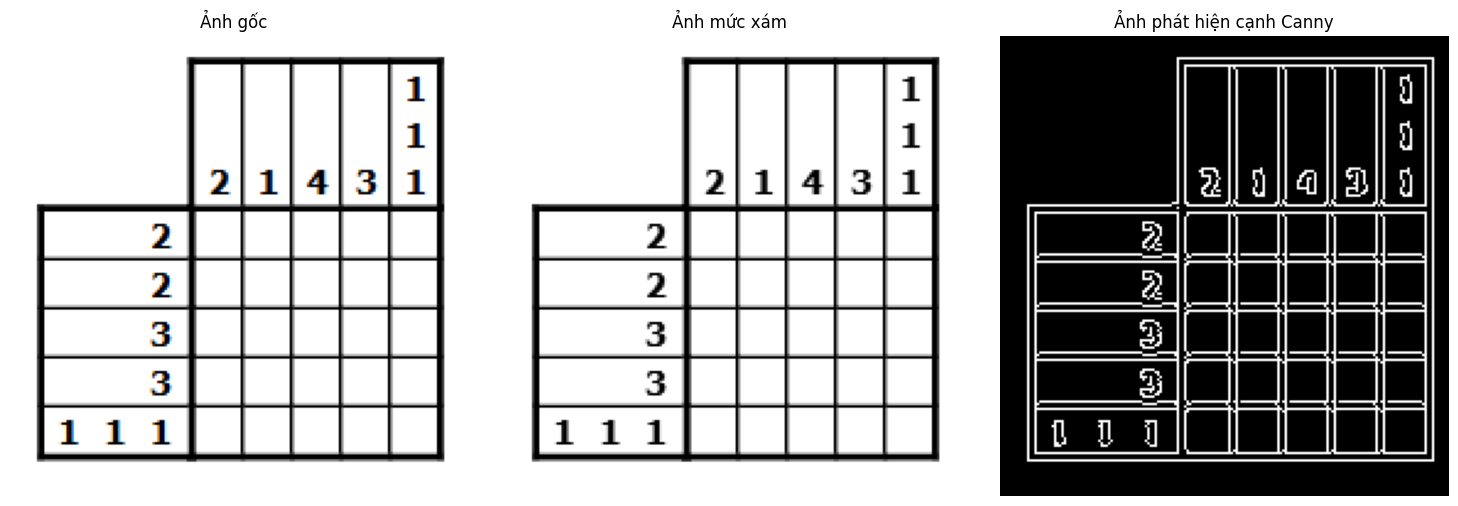

In [ ]:
# Đọc ảnh gốc
image_path = '/content/drive/MyDrive/2_XLA/test4.png'
image = cv2.imread(image_path)

# Chuyển ảnh sang mức xám
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng Gaussian Blur
blur = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Phát hiện cạnh Canny
edges = cv2.Canny(blur, 50, 150)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Ảnh gốc')
axes[0].axis('off')

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Ảnh mức xám')
axes[1].axis('off')

axes[2].imshow(edges, cmap='gray')
axes[2].set_title('Ảnh phát hiện cạnh Canny')
axes[2].axis('off')

plt.tight_layout()
plt.show()

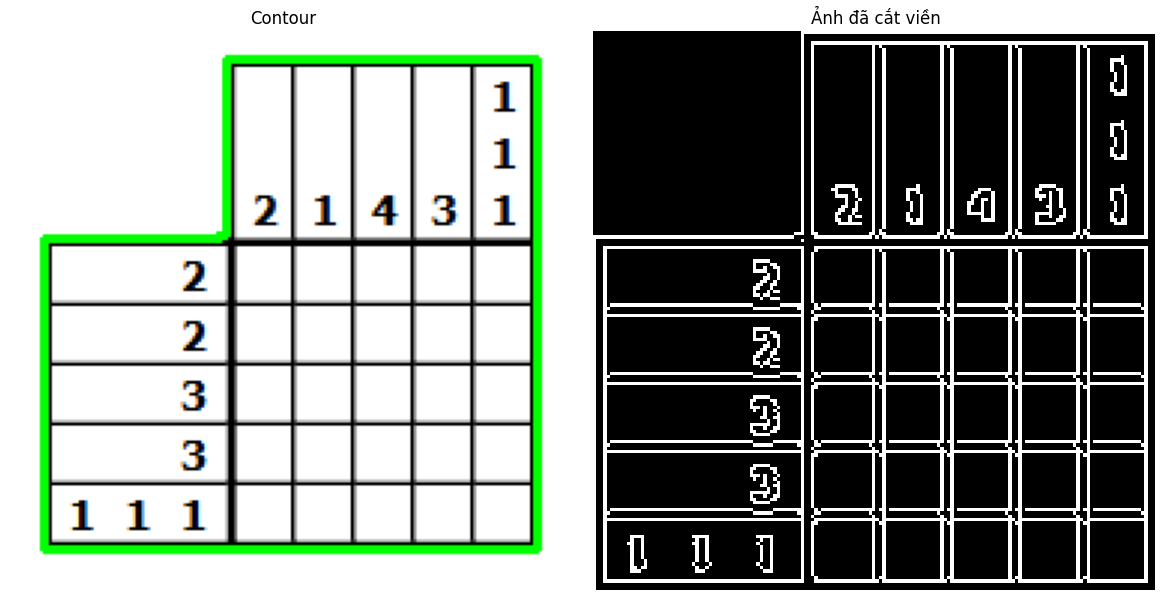

In [ ]:
# Tìm contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Lấy contour lớn nhất theo diện tích
largest_contour = max(contours, key=cv2.contourArea)

# Vẽ contour lớn nhất lên ảnh gốc để hiển thị
contour_image = image.copy()
cv2.drawContours(contour_image, [largest_contour], -1, (0, 255, 0), 2)

# Lấy hình chữ nhật bao quanh contour lớn nhất
x, y, w, h = cv2.boundingRect(largest_contour)
grid = edges[y:y+h, x:x+w]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Contour')
axes[0].axis('off')

axes[1].imshow(grid, cmap='gray')
axes[1].set_title('Ảnh đã cắt viền')
axes[1].axis('off')

plt.tight_layout()
plt.show()

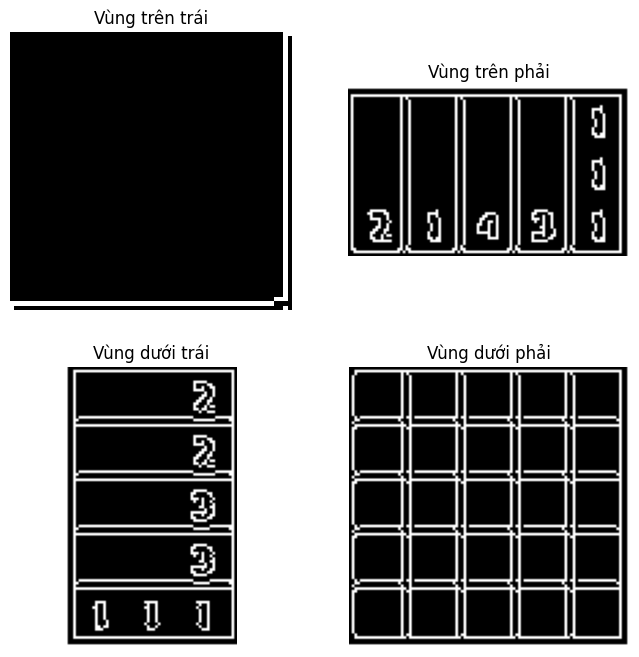

In [ ]:
# Chia lưới thành các vùng
square_size = 103
horizontal_line_y = max(0, grid.shape[0] - square_size)
vertical_line_x = max(0, grid.shape[1] - square_size)

top_left = grid[:horizontal_line_y, :vertical_line_x]
top_right = grid[:horizontal_line_y, vertical_line_x:]
bottom_left = grid[horizontal_line_y:, :vertical_line_x]
bottom_right = grid[horizontal_line_y:, vertical_line_x:]


plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(top_left, cmap='gray')
plt.title('Vùng trên trái')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(top_right, cmap='gray')
plt.title('Vùng trên phải')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(bottom_left, cmap='gray')
plt.title('Vùng dưới trái')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(bottom_right, cmap='gray')
plt.title('Vùng dưới phải')
plt.axis('off')
plt.show()

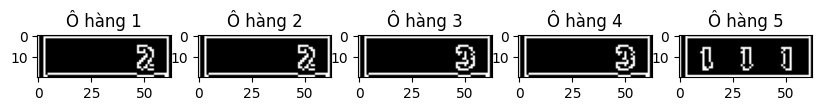

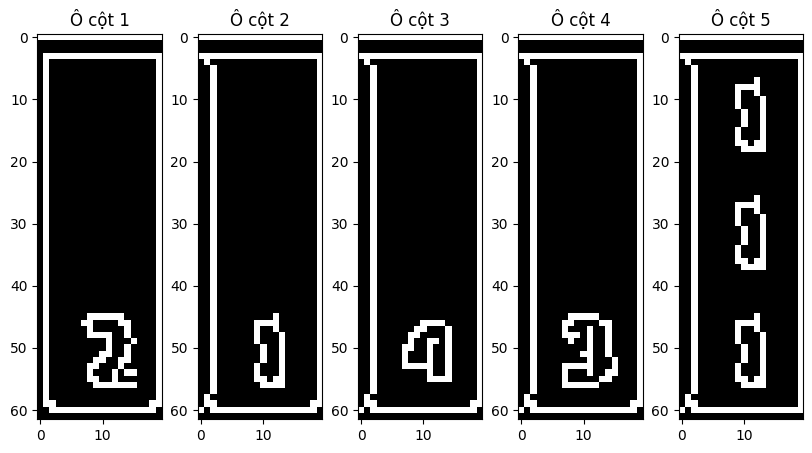

In [ ]:
# Định nghĩa hàm chia vùng thành các ô
def split_into_cells(region, num_cells, axis=0):
    cell_size = region.shape[axis] // num_cells   # Kích thước mỗi ô khi chia
    cells = [region[i*cell_size:(i+1)*cell_size] if axis == 0 else region[:, i*cell_size:(i+1)*cell_size] for i in range(num_cells)] # Danh sách các ô được chia
    return cells

# Chia vùng dưới trái và trên phải thành các ô
num_rows, num_columns = 5, 5
row_cells = split_into_cells(bottom_left, num_rows, axis=0)
column_cells = split_into_cells(top_right, num_columns, axis=1)

plt.figure(figsize=(10, 5))
for i, cell in enumerate(row_cells):
    plt.subplot(1, num_rows, i+1)
    plt.imshow(cell, cmap='gray')
    plt.title(f'Ô hàng {i+1}')
plt.show()

plt.figure(figsize=(10, 5))
for i, cell in enumerate(column_cells):
    plt.subplot(1, num_columns, i+1)
    plt.imshow(cell, cmap='gray')
    plt.title(f'Ô cột {i+1}')
plt.show()

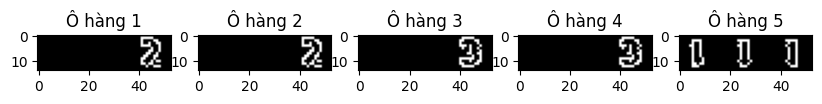

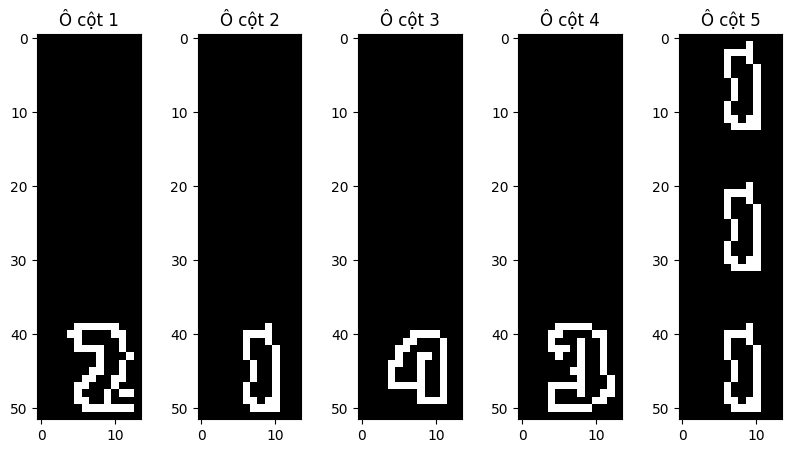

In [ ]:
# Hàm cắt viền ảnh
def crop_margins(image, top, bottom, left, right):
    return image[top:image.shape[0]-bottom, left:image.shape[1]-right] # Cắt

# Chia vùng thành các ô và hiển thị
num_rows, num_columns = 5, 5
row_cells = split_into_cells(bottom_left, num_rows, axis=0)
column_cells = split_into_cells(top_right, num_columns, axis=1)

def display_cells(cells, crop_values, num_cells, title):
    plt.figure(figsize=(10, 5))
    for i, cell in enumerate(cells):
        cropped_cell = crop_margins(cell, *crop_values)
        plt.subplot(1, num_cells, i+1)
        plt.imshow(cropped_cell, cmap='gray')
        plt.title(f'{title} {i+1}')
    plt.show()

display_cells(row_cells, (4, 2, 6, 4), num_rows, 'Ô hàng')
display_cells(column_cells, (6, 4, 3, 3), num_columns, 'Ô cột')

Giá trị của hàng: [[2], [2], [3], [3], [1, 1, 1]]
Giá trị của cột: [[2], [1], [4], [3], [1, 1, 1]]


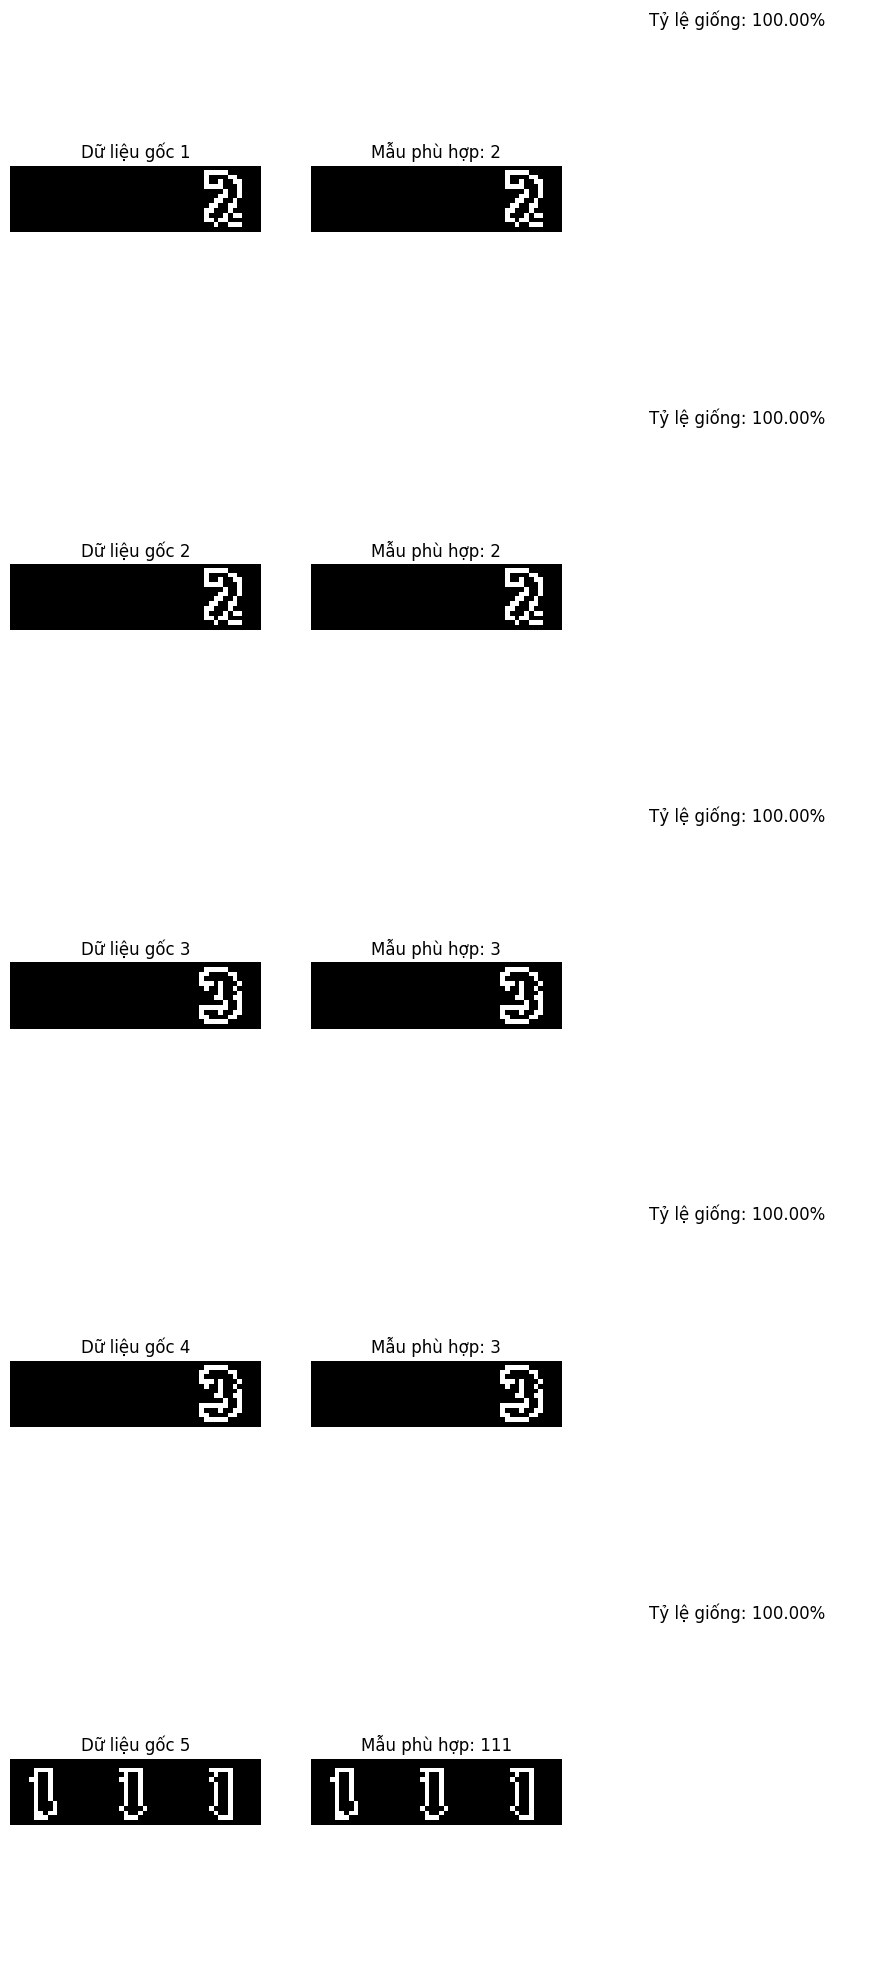

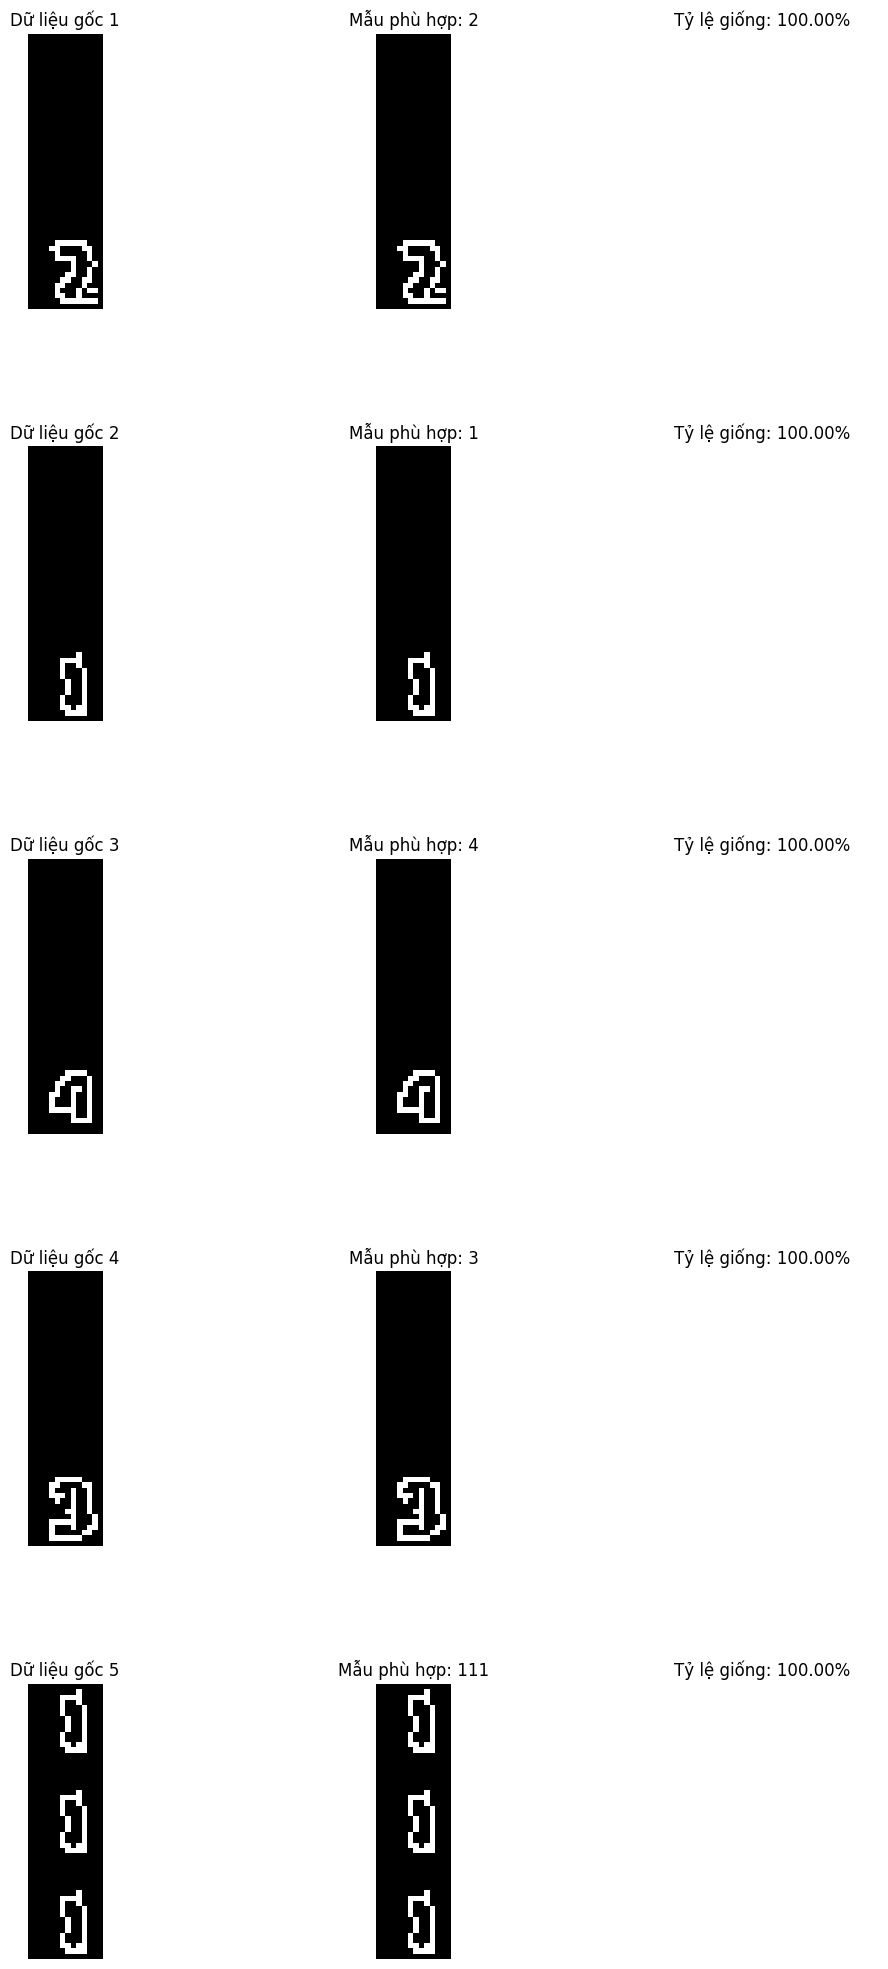

In [ ]:
# Định nghĩa đường dẫn đến các thư mục chứa ảnh mẫu
column_sample_dir = '/content/drive/MyDrive/2_XLA/Column_samples'
row_sample_dir = '/content/drive/MyDrive/2_XLA/Row_samples'

# Hàm để thực hiện so khớp mẫu và tìm mẫu phù hợp nhất
def find_best_template_match(cell_image, sample_dir, size_threshold=10):
    best_match_score, best_value, best_match_image = -1, None, None

    for sample_filename in os.listdir(sample_dir):
        sample_path = os.path.join(sample_dir, sample_filename)
        sample_image = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

        if sample_image.shape[0] > cell_image.shape[0] or sample_image.shape[1] > cell_image.shape[1]:
            continue

        size_diff = abs(cell_image.shape[0] - sample_image.shape[0]) + abs(cell_image.shape[1] - sample_image.shape[1])
        if size_diff > size_threshold:
            continue

        res = cv2.matchTemplate(cell_image, sample_image, cv2.TM_CCOEFF_NORMED)
        _, max_val, _, _ = cv2.minMaxLoc(res)

        if max_val > best_match_score:
            best_match_score = max_val
            best_value = sample_filename.split(' ')[0]
            best_match_image = sample_image

    return best_value, best_match_image, best_match_score

# Hàm để chia các giá trị nối thành các danh sách số nguyên
def parse_concatenated_values(value):
    return [int(char) for char in value if char.isdigit()]

# Định nghĩa hàm để cắt viền ảnh
def crop_margins(image, top, bottom, left, right):
    return image[top:-bottom, left:-right]

col_values, row_values = [], []

fig_row, axes_row = plt.subplots(nrows=len(row_cells), ncols=3, figsize=(11, len(row_cells) * 5))
fig_col, axes_col = plt.subplots(nrows=len(column_cells), ncols=3, figsize=(12, len(column_cells) * 5))

def process_cells(cells, sample_dir, crop_margins_values, axes, values_list):
    for i, cell in enumerate(cells):
        cropped_cell = crop_margins(cell, *crop_margins_values)
        best_match_value, best_match_image, best_match_score = find_best_template_match(cropped_cell, sample_dir)
        if best_match_value:
            values_list.append(parse_concatenated_values(best_match_value))

        axes[i, 0].imshow(cropped_cell, cmap='gray')
        axes[i, 0].set_title(f'Dữ liệu gốc {i+1}')
        axes[i, 0].axis('off')

        if best_match_image is not None:
            axes[i, 1].imshow(best_match_image, cmap='gray')
            axes[i, 1].set_title(f'Mẫu phù hợp: {best_match_value}')
            axes[i, 1].axis('off')

            res = cv2.matchTemplate(cropped_cell, best_match_image, cv2.TM_CCOEFF_NORMED)
            axes[i, 2].set_title(f'Tỷ lệ giống: {round(best_match_score*100):.2f}%')
            axes[i, 2].axis('off')
        else:
            axes[i, 1].set_title('Không mẫu nào giống!')
            axes[i, 1].axis('off')
            axes[i, 2].axis('off')

process_cells(row_cells, row_sample_dir, (4, 2, 6, 4), axes_row, row_values)
process_cells(column_cells, column_sample_dir, (6, 4, 3, 3), axes_col, col_values)

print("Giá trị của hàng:", row_values)
print("Giá trị của cột:", col_values)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


# **GIẢI THUẬT NONOGRAM**

In [ ]:
def find_options(length, filled, pattern='', empty=''):
    total_empty = length - sum(filled) - len(filled) + 1
    lines = []

    for pad in range(total_empty + 1):
        line = '0' * pad + '1' * filled[0]
        if len(filled) > 1:
            subs = find_options(length - len(line) - 1, filled[1:])
            lines.extend([line + '0' + sub for sub in subs])
        else:
            lines.append(line + '0' * (length - len(line)))

    if pattern:
        mask = int(pattern, 2)
        lines = [line for line in lines if (int(line, 2) & mask) == mask]
    if empty:
        mask = int(empty, 2)
        lines = [line for line in lines if not (int(line, 2) & mask)]

    return lines

def find_overlap(length, patterns):
    if not patterns:
        return '0' * length
    overlap = int(patterns[0], 2)
    for pattern in patterns[1:]:
        overlap &= int(pattern, 2)
    return f'{overlap:0{length}b}'

def find_empty(length, potential):
    patterns = [''.join('1' if bit == '0' else '0' for bit in pattern) for pattern in potential]
    return find_overlap(length, patterns)

def update_existing(col_existing, row_existing):
    for r_idx, row in enumerate(row_existing):
        for c_idx, cell in enumerate(row):
            if cell == '1':
                col_existing[c_idx] = col_existing[c_idx][:r_idx] + '1' + col_existing[c_idx][r_idx+1:]
            if col_existing[c_idx][r_idx] == '1':
                row_existing[r_idx] = row_existing[r_idx][:c_idx] + '1' + row_existing[r_idx][c_idx+1:]
    return row_existing, col_existing

def solve(length, horizontal_grid, vertical_grid, max_passes=0):
    def process_grid(grid, existing, empty):
        for idx, constraints in enumerate(grid):
            patterns = find_options(length, constraints, existing[idx], empty[idx])
            if not patterns:
                print(f"No patterns found for index {idx} with constraints {constraints}")
            existing[idx] = find_overlap(length, patterns)
            empty[idx] = find_empty(length, patterns)

    horizontal_existing = ['0' * length] * len(horizontal_grid)
    vertical_existing = ['0' * length] * len(vertical_grid)
    horizontal_empty = ['0' * length] * len(horizontal_grid)
    vertical_empty = ['0' * length] * len(vertical_grid)

    process_grid(horizontal_grid, horizontal_existing, horizontal_empty)
    process_grid(vertical_grid, vertical_existing, vertical_empty)

    passes = 0
    done = False

    while not done:
        horiz_backup, vert_backup = horizontal_existing[:], vertical_existing[:]

        vertical_existing, horizontal_existing = update_existing(horizontal_existing, vertical_existing)
        vertical_empty, horizontal_empty = update_existing(horizontal_empty, vertical_empty)

        process_grid(horizontal_grid, horizontal_existing, horizontal_empty)
        process_grid(vertical_grid, vertical_existing, vertical_empty)

        if horizontal_existing == horiz_backup and vertical_existing == vert_backup:
            done = True
        passes += 1

        if max_passes and passes >= max_passes:
            done = True

    return horizontal_existing, horizontal_empty, passes

def print_nonogram(horizontal_grid, vertical_grid, solved):
    max_row_label_width = max(len(str(row)) for row in horizontal_grid)
    col_labels = [" " * max_row_label_width] + [str(col).center(5) for col in vertical_grid]
    print(" " * (max_row_label_width + 2) + " ".join(col_labels))

    for row_label, row in zip(horizontal_grid, solved):
        print(str(row_label).rjust(max_row_label_width) + "  " + "  ".join(row))

length = 5
horizontal_grid = row_values
vertical_grid = col_values

solved, empty, passes = solve(length, horizontal_grid, vertical_grid)

solved = [['1' if char == '1' else '0' for char in line] for line in solved]

print("Nonogram Solution:")
print_nonogram(horizontal_grid, vertical_grid, solved)


Nonogram Solution:
                      [2]   [1]   [4]   [3]  [1, 1, 1]
      [2]  0  0  0  1  1
      [2]  0  0  1  1  0
      [3]  0  0  1  1  1
      [3]  1  1  1  0  0
[1, 1, 1]  1  0  1  0  1


# **HIỆN ẢNH SAU KHI GIẢI**

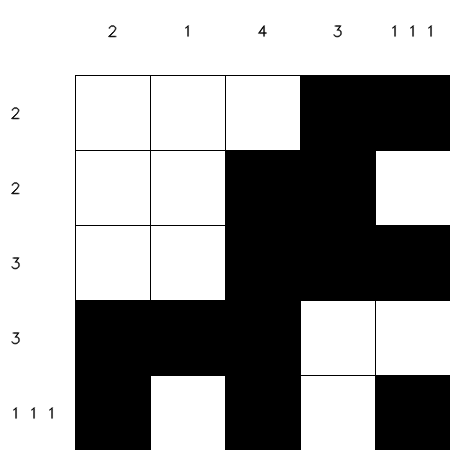

In [ ]:
def draw_nonogram(horizontal_grid, vertical_grid, solved):
    cell_size = 75  # Kích thước các ô 5x5
    margin = 75  # Kích thước lề
    grid_height = len(horizontal_grid)
    grid_width = len(vertical_grid)

    # Tính kích thước của ảnh
    img_height = cell_size * grid_height + margin
    img_width = cell_size * grid_width + margin

    # Tạo ảnh trắng
    img = np.ones((img_height, img_width, 3), dtype=np.uint8) * 255

    # Vẽ các ô trong lưới
    for i in range(grid_height):
        for j in range(grid_width):
            x = margin + j * cell_size
            y = margin + i * cell_size

            if solved[i][j] == '1':
                cv2.rectangle(img, (x, y), (x + cell_size, y + cell_size), (0, 0, 0), -1)
            else:
                cv2.rectangle(img, (x, y), (x + cell_size, y + cell_size), (255, 255, 255), -1)
            cv2.rectangle(img, (x, y), (x + cell_size, y + cell_size), (0, 0, 0), 1)

    # Vẽ các nhãn hàng ngang
    for i, row in enumerate(horizontal_grid):
        text = ' '.join(map(str, row))
        text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        text_x = 10
        text_y = margin + i * cell_size + (cell_size + text_size[1]) // 2
        cv2.putText(img, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    # Vẽ các nhãn hàng dọc
    for j, col in enumerate(vertical_grid):
        text = ' '.join(map(str, col))
        text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)[0]
        text_x = margin + j * cell_size + (cell_size - text_size[0]) // 2
        text_y = 30 + text_size[1] // 2
        cv2.putText(img, text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    return img

# Vẽ nonogram và hiển thị hình ảnh
img = draw_nonogram(horizontal_grid, vertical_grid, solved)
cv2_imshow(img)